# Step - 1 Bussiness problem Understanding 
# identify relationship between total advertiging spend and sales?
# our next ad campaign will have a total spend of $200,000 , how many units do we expect to sell as result of this time ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. data understanding 

In [2]:
df =pd.read_csv("advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
df['total_spend']= df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [5]:
df= df.drop(columns=['TV','radio','newspaper'])
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


# exploratory data analysis (EDA)

In [6]:
continous =["total_spend","sales"]

In [7]:
df[continous].describe()

,total_spend,sales
count,200.000000,200.000000
mean,200860.500000,14022.500000
std,92985.180587,5217.456566
min,11700.000000,1600.000000
25%,123550.000000,10375.000000
50%,207350.000000,12900.000000
75%,281125.000000,17400.000000
max,433600.000000,27000.000000


In [8]:
df[continous].skew()


total_spend    0.049488
sales          0.407571
dtype: float64

<Axes: xlabel='total_spend', ylabel='sales'>

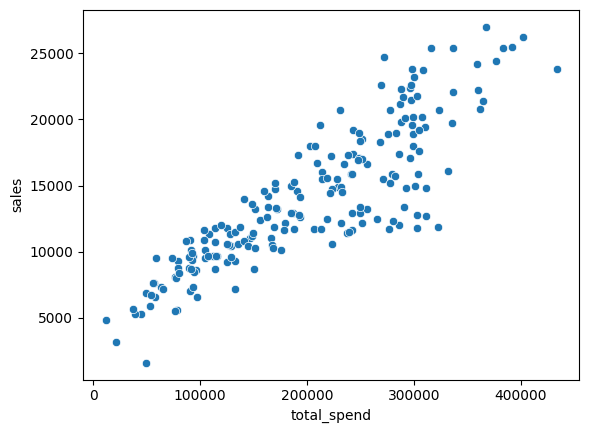

In [9]:
sns.scatterplot(x="total_spend",y="sales",data=df)

In [10]:
df[continous].corr()

,total_spend,sales
total_spend,1.000000,0.867712
sales,0.867712,1.000000


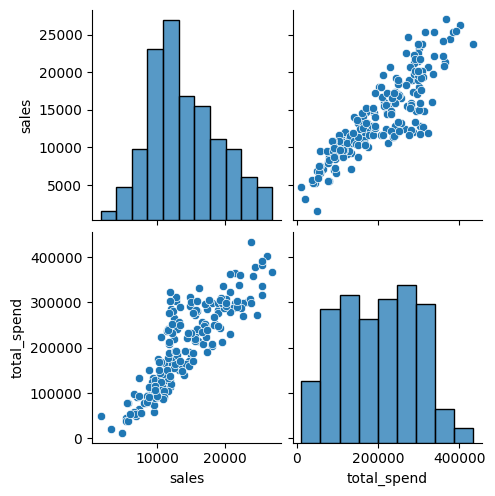

In [11]:
sns.pairplot(df)
plt.show()

# Data preprocessing 

# data cleaning

In [12]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

In [13]:
### no requrided cleaning


# data wangling

In [14]:
#no encoding is required ( no categorical data)

# scalling 

In [15]:
# scaling is not required 
# scaling applicable when we multiply input variable with different magnitude
# never apply scaling on output variable 

# create  x,y

In [16]:
x=df[['total_spend']]
y=df['sales']

In [17]:
!pip install scikit-learn


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=77)

# modeling 

In [19]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
print("coffiecent",model.coef_)
print("intercept",model.intercept_)

coffiecent [0.04784052]
intercept 4389.814518436082


# evaluation


In [21]:
# prediction on data 
ypred_train = model.predict(x_train)
#evaluation 
from sklearn.metrics import mean_squared_error
print("train RMSE",np.sqrt(mean_squared_error(y_train,ypred_train)))

train RMSE 2628.0117251844995


In [30]:
#prediction on test data
ypred_test =model.predict(x_test)
#evaluation on test 
print("test error",np.sqrt(mean_squared_error(y_test,ypred_test)))
from sklearn.metrics import r2_score 
print("test R2",r2_score(y_test,ypred_test))


test error 2422.590173704026
test R2 0.7868779454628924


In [26]:
from sklearn.metrics import r2_score 
print("train R2",r2_score(y_train,ypred_train))

train R2 0.7426281082244577


In [31]:
#cross validation 
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,x_train,y_train,cv=5,scoring="r2").mean())

0.7326556921038282


In [ ]:
#0.74==0.78 no over fiting no under fitting
#0.74==0.73 train error == cross validation 

# use the model to make prediction on a new  value .for a total spend of 200k on ads , how many units could we except to be sold?


In [32]:
model.predict([[200000]])

C:\Users\Victus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13957.91946809])

In [38]:
from joblib import dump
#dump(modelname,name to save )
dump(model,'sales_model.joblib')

['sales_model.joblib']

In [39]:
pwd


'C:\\Users\\Victus\\Desktop\\demo'